In [2]:
#Importing required libraries
import librosa
import soundfile
import pandas as pd,numpy as np
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import seaborn as sns

file_dir="./data/"

#Emotion dictionary with emotion code
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}


#Getting all audio files paths
audio_files = []
for (dirpath, dirnames, filenames) in os.walk("./data"):
        audio_files.extend([dirpath.split('\\')[-1]+'/'+file for file in filenames])

#Creeating dataframe with each filename and emotion
person=[]
filename=[]
emotion=[]
emotioncd=[]
for file in audio_files:
    person.append(file.split('/')[0])
    filename.append(file.split('/')[1])
    emotion.append(emotions[str(file.split('/')[1].split('-')[0])])
    emotioncd.append(str(file.split('/')[1].split('-')[0]))
speech_df=pd.DataFrame({'person':person,'filename':filename,'emotion':emotion,'emotioncd':emotioncd})

In [3]:
len(audio_files)

1440

In [4]:
speech_df

,person,filename,emotion,emotioncd
0,Person01,01-01-01-01-01.wav,neutral,01
1,Person01,01-01-01-02-01.wav,neutral,01
2,Person01,01-01-02-01-01.wav,neutral,01
3,Person01,01-01-02-02-01.wav,neutral,01
4,Person01,02-01-01-01-01.wav,calm,02
...,...,...,...,...
1435,Person24,08-01-02-02-24.wav,surprised,08
1436,Person24,08-02-01-01-24.wav,surprised,08
1437,Person24,08-02-01-02-24.wav,surprised,08
1438,Person24,08-02-02-01-24.wav,surprised,08


In [5]:
speech_df.describe()

,person,filename,emotion,emotioncd
count,1440,1440,1440,1440
unique,24,1440,8,8
top,Person23,07-01-02-01-08.wav,disgust,07
freq,60,1,192,192


In [6]:
pd.DataFrame(speech_df.groupby('emotion')['filename'].count()).rename(columns={'filename':'count'}).reset_index()

,emotion,count
0,angry,192
1,calm,192
2,disgust,192
3,fearful,192
4,happy,192
5,neutral,96
6,sad,192
7,surprised,192


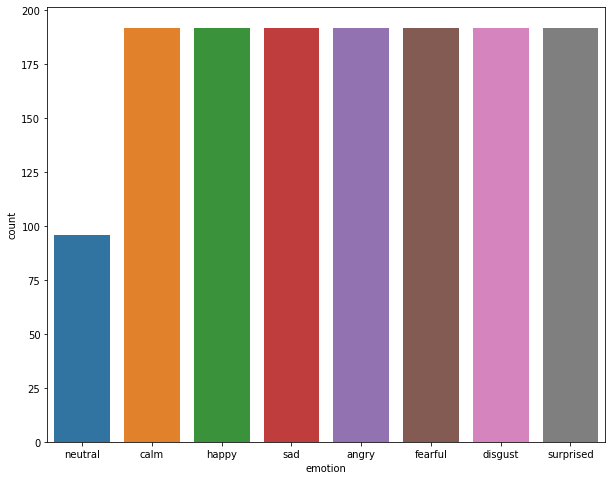

In [7]:
plt.figure(figsize = (10, 8))
sns.countplot(speech_df['emotion'])
plt.show()

In [8]:
def plot_waveplot(x,sr):
    plt.figure(figsize=(8, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.title('Waveplot')
    
def plot_spectrogram(x,sr):
    plt.figure(figsize=(8, 4))
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr)
    plt.title('Spectogram')
                        
def plot_mfcc(x,sr):
    plt.figure(figsize=(8, 4))
    mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=20)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.title('MFCC')

./data/Person01/05-01-01-01-01.wav


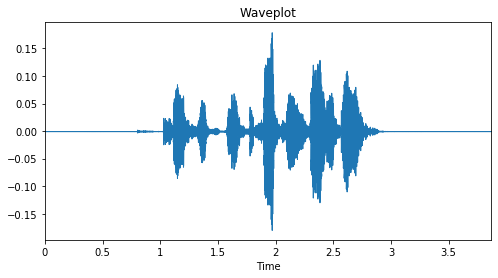

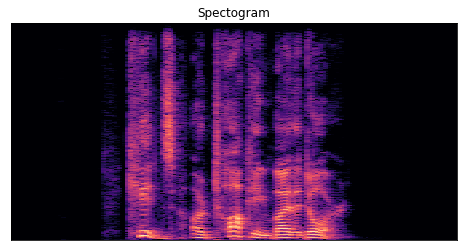

In [10]:
angry_df=speech_df[speech_df['emotion']=='angry'].reset_index()
for ind in angry_df.index[:1]:
    filepath=file_dir+angry_df['person'][ind]+"/"+angry_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)

./data/Person01/02-01-01-01-01.wav


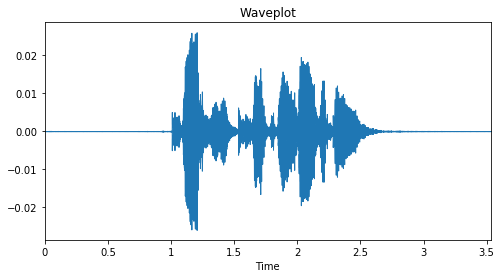

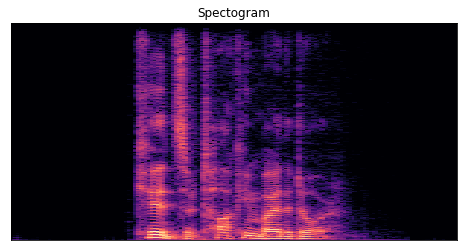

In [12]:
calm_df=speech_df[speech_df['emotion']=='calm'].reset_index()
for ind in calm_df.index[:1]:
    filepath=file_dir+calm_df['person'][ind]+"/"+calm_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)

./data/Person01/07-01-01-01-01.wav


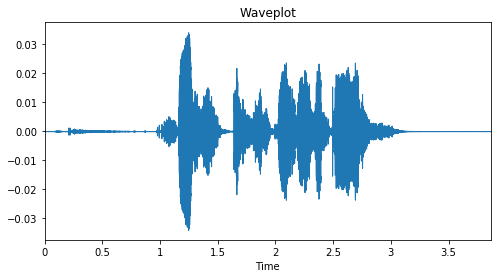

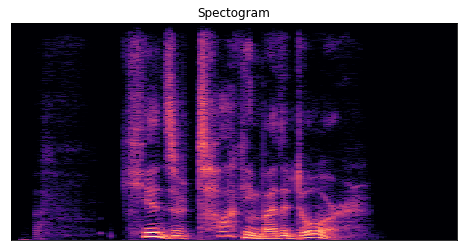

In [13]:
disgust_df=speech_df[speech_df['emotion']=='disgust'].reset_index()
for ind in calm_df.index[:1]:
    filepath=file_dir+disgust_df['person'][ind]+"/"+disgust_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)

./data/Person01/06-01-01-01-01.wav


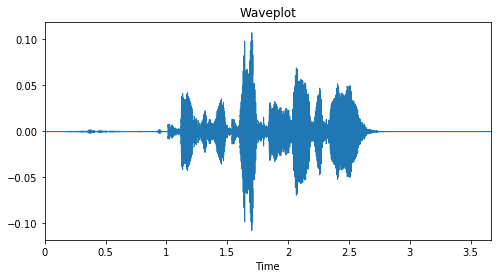

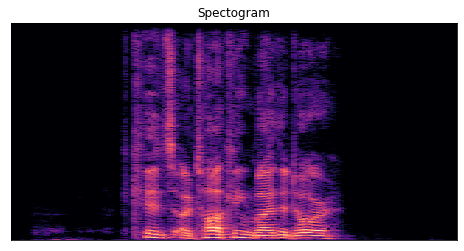

In [14]:
fearful_df=speech_df[speech_df['emotion']=='fearful'].reset_index()
for ind in calm_df.index[:1]:
    filepath=file_dir+fearful_df['person'][ind]+"/"+fearful_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)

./data/Person01/03-01-01-01-01.wav


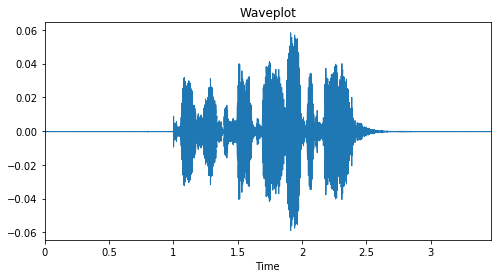

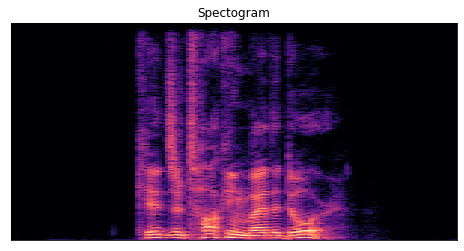

In [15]:
happy_df=speech_df[speech_df['emotion']=='happy'].reset_index()
for ind in calm_df.index[:1]:
    filepath=file_dir+happy_df['person'][ind]+"/"+happy_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)

./data/Person01/01-01-01-01-01.wav


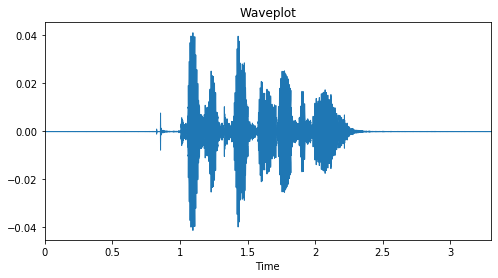

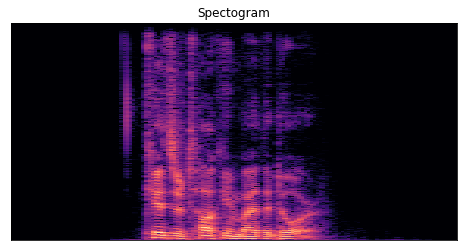

In [16]:
neutral_df=speech_df[speech_df['emotion']=='neutral'].reset_index()
for ind in calm_df.index[:1]:
    filepath=file_dir+neutral_df['person'][ind]+"/"+neutral_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)

./data/Person01/04-01-01-01-01.wav


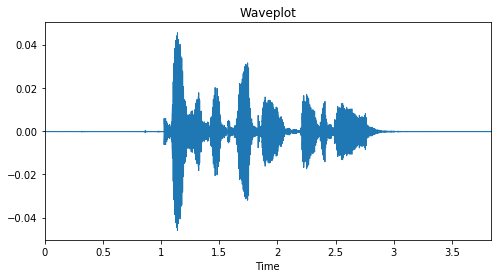

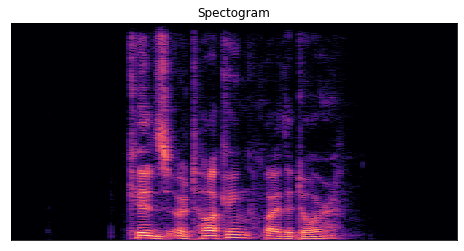

In [17]:
sad_df=speech_df[speech_df['emotion']=='sad'].reset_index()
for ind in calm_df.index[:1]:
    filepath=file_dir+sad_df['person'][ind]+"/"+sad_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)

./data/Person01/08-01-01-01-01.wav


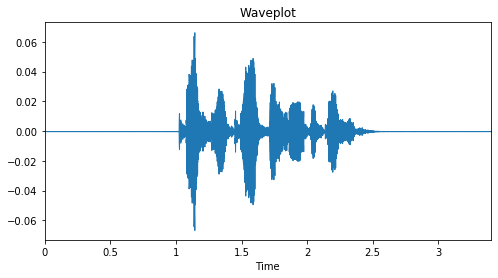

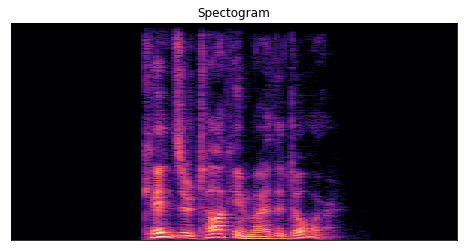

In [18]:
surprised_df=speech_df[speech_df['emotion']=='surprised'].reset_index()
for ind in calm_df.index[:1]:
    filepath=file_dir+surprised_df['person'][ind]+"/"+surprised_df['filename'][ind]
    print(filepath)
    x, sr = librosa.load(filepath)
    plot_waveplot(x,sr)
    plot_spectrogram(x,sr)